In [ ]:
YIELD CALCULATIONS FOR GLUCOSE CONCENTRATIONS WITHOUT DRYWEIGHT

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [54]:
#this opens the file with the data and names it data 
data = pd.read_csv(r'C:\Users\gosse\Desktop\reseach project\glucoseconcentrationsTOM1.csv',sep=';')
time = [0, 1.25, 2, 2.75, 3.5, 4.25, 5]
data

,WT0,WT1,WT2,WT3,WT4,WT5,WT6,MT0,MT1,MT2,MT3,MT4,MT5,MT6
0,19.352,19.256,19.435,19.51,19.183,19.436,19.363,19.657,19.739,19.574,19.689,19.623,19.43,19.542


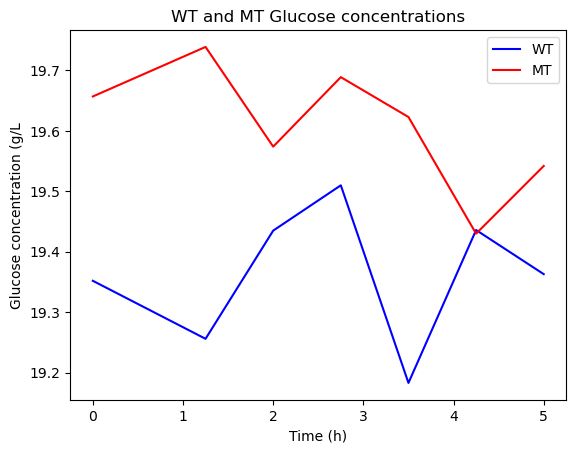

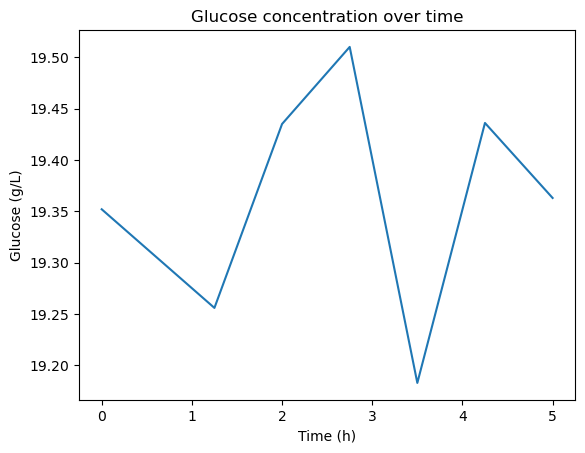

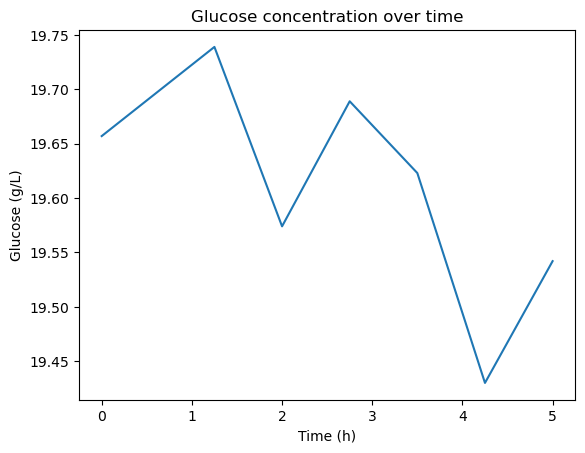

In [55]:
#splits the data
splitMT_WT = data.columns.get_loc('MT0')
WT_data = data.iloc[:,:splitMT_WT]
MT_data = data.iloc[:, splitMT_WT:]

#
plt.plot(time, WT_data.loc[0], color = 'blue', label = 'WT')
plt.plot(time, MT_data.loc[0], color = 'red', label = 'MT')
plt.xlabel('Time (h)')
plt.ylabel('Glucose concentration (g/L')
plt.title('WT and MT Glucose concentrations')
plt.legend()
plt.show()

#plots the individual graphs with linear regression
def plot_individual(type):
    plt.plot(time, type)
   # slope, intercept = np.polyfit(time, type.loc["Average"], 1)
   # regression_line = np.poly1d([slope, intercept])
   # plt.plot(time, regression_line(time), color='red', label='Linear Regression', linestyle = '--')
   # equation = f"y = {slope:.2f}x + {intercept:.2f}"
   # plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
   # r_squared = r2_score(type.loc["Average"], regression_line(time))
    
    # Add the R-squared annotation
   # r_squared_annotation = f"R^2 = {r_squared:.2f}"
   # plt.annotate(r_squared_annotation, xy=(0.05, 0.90), xycoords='axes fraction', ha='left', va='top')
    plt.xlabel('Time (h)')
    plt.ylabel('Glucose (g/L)')
    plt.title("Glucose concentration over time")
    plt.show()
    
plot_individual(WT_data.loc[0])
plot_individual(MT_data.loc[0])

C:\Users\gosse\AppData\Local\Temp\ipykernel_30636\3198598589.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_point = data[0]
C:\Users\gosse\AppData\Local\Temp\ipykernel_30636\3198598589.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_point = data[-1]


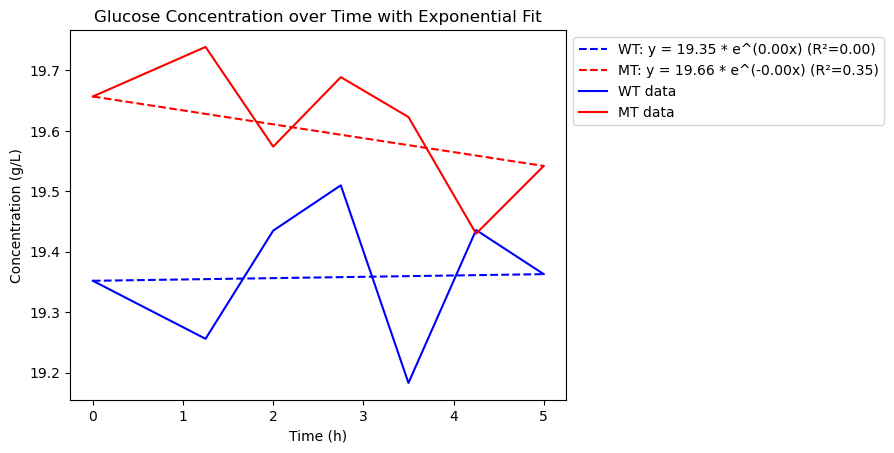

In [57]:
def deltaS(data):
    first_point = data[0]
    last_point = data[-1]
    return first_point, last_point

# Calculate first and last points for WT and MT
WT_S_first, WT_S_last = deltaS(WT_data.loc[0])
MT_S_first, MT_S_last = deltaS(MT_data.loc[0])

# Perform exponential regression for WT
log_WT_S_first = np.log(WT_S_first)
log_WT_S_last = np.log(WT_S_last)
slope_WT = (log_WT_S_last - log_WT_S_first) / (time[-1] - time[0])
intercept_WT = log_WT_S_first - slope_WT * time[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * np.array(time))
r2_WT = r2_score(WT_data.loc[0], exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_S_first)
log_MT_S_last = np.log(MT_S_last)
slope_MT = (log_MT_S_last - log_MT_S_first) / (time[-1] - time[0])
intercept_MT = log_MT_S_first - slope_MT * time[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * np.array(time))
r2_MT = r2_score(MT_data.loc[0], exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Plot the data
plt.plot(time, WT_data.loc[0], color='blue', label='WT data')
plt.plot(time, MT_data.loc[0], color='red', label='MT data')

plt.xlabel('Time (h)')
plt.ylabel('Concentration (g/L)')
plt.title('Glucose Concentration over Time with Exponential Fit')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

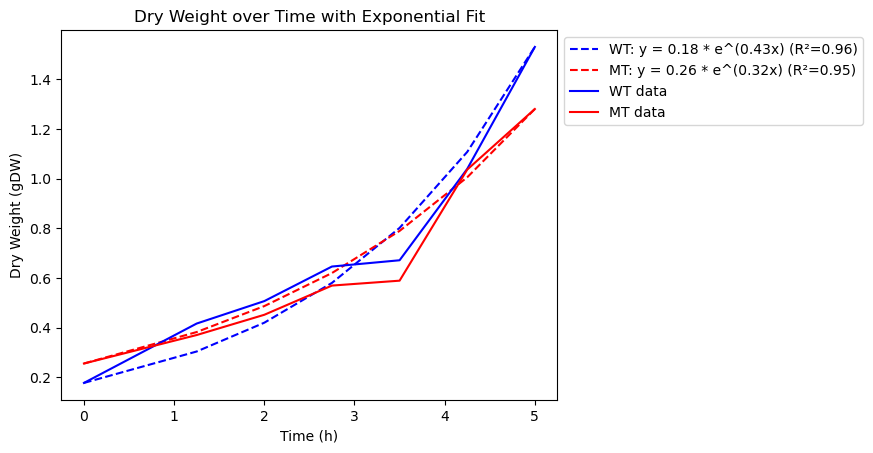

In [45]:
def calculate_dX(type, time, growthrate):
    growth = growthrate[type]
    dX = growth * time[-1]
    return dX

# Growth rates
growthrates = {'WT': 0.306, 'MT': 0.256}

# Calculate dX
WT_dX = calculate_dX('WT', time, growthrates)
MT_dX = calculate_dX('MT', time, growthrates)

# Function to calculate weight per cell
def calculate_weightpercell(type, dryweight, cellcount):
    cells = cellcount[type].iloc[-1]
    weight_per_cell = dryweight / cells
    points = []
    for x in cellcount[type]:
        weight = x * weight_per_cell
        points.append(weight)
    return points

# Calculate weight per cell
WT_weightdata = calculate_weightpercell('WT', WT_dX, cellcount)
MT_weightdata = calculate_weightpercell('MT', MT_dX, cellcount)

# Perform exponential regression for WT
log_WT_weightdata_first = np.log(WT_weightdata[0])
log_WT_weightdata_last = np.log(WT_weightdata[-1])
slope_WT = (log_WT_weightdata_last - log_WT_weightdata_first) / (time[-1] - time[0])
intercept_WT = log_WT_weightdata_first - slope_WT * time[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * np.array(time))
r2_WT = r2_score(WT_weightdata, exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_weightdata_first = np.log(MT_weightdata[0])
log_MT_weightdata_last = np.log(MT_weightdata[-1])
slope_MT = (log_MT_weightdata_last - log_MT_weightdata_first) / (time[-1] - time[0])
intercept_MT = log_MT_weightdata_first - slope_MT * time[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * np.array(time))
r2_MT = r2_score(MT_weightdata, exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Plot the data
plt.plot(time, WT_weightdata, color='blue', label='WT data')
plt.plot(time, MT_weightdata, color='red', label='MT data')

plt.xlabel('Time (h)')
plt.ylabel('Dry Weight (gDW)')
plt.title('Dry Weight over Time with Exponential Fit')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

[109.24250403  46.26484864  38.3648345   30.21091856  28.58787026
  18.70921714  12.65555556]


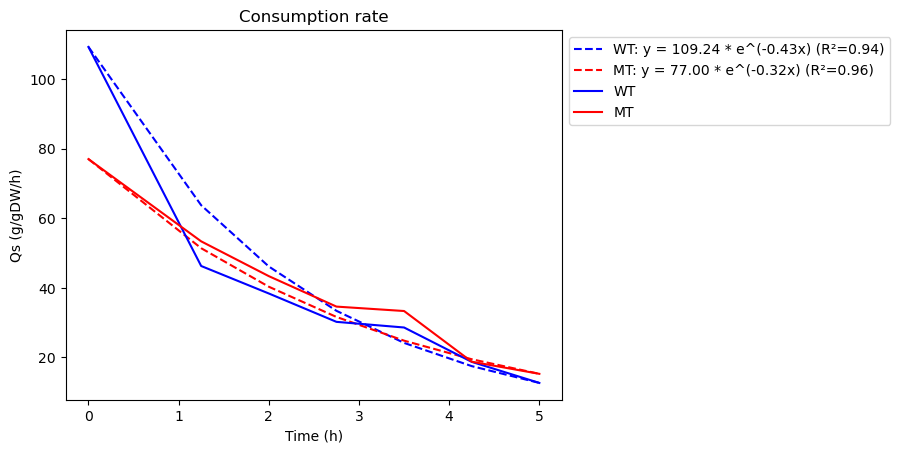

In [58]:
def deltaS(data):
    first_point = data.iloc[0]
    last_point = data.iloc[-1]
    return first_point, last_point

WT_S_first, WT_S_last = deltaS(WT_data.loc[0] / WT_weightdata)
MT_S_first, MT_S_last = deltaS(MT_data.loc[0] / MT_weightdata)

# Calculate Qs in g/gDW/h
WT_Qs = WT_data.loc[0].values / WT_weightdata
MT_Qs = MT_data.loc[0].values / MT_weightdata
print(WT_Qs)
# Perform exponential regression for WT
log_WT_S_first = np.log(WT_Qs[0])
log_WT_S_last = np.log(WT_Qs[-1])
slope_WT = (log_WT_S_last - log_WT_S_first) / (time[-1] - time[0])
intercept_WT = log_WT_S_first - slope_WT * time[0]
a_WT = np.exp(intercept_WT)
b_WT = slope_WT
exp_line_WT = a_WT * np.exp(b_WT * np.array(time))
r2_WT = r2_score(WT_Qs, exp_line_WT)
WT_formula = f'WT: y = {a_WT:.2f} * e^({b_WT:.2f}x) (R²={r2_WT:.2f})'
plt.plot(time, exp_line_WT, color='blue', linestyle='--', label=WT_formula)

# Perform exponential regression for MT
log_MT_S_first = np.log(MT_Qs[0])
log_MT_S_last = np.log(MT_Qs[-1])
slope_MT = (log_MT_S_last - log_MT_S_first) / (time[-1] - time[0])
intercept_MT = log_MT_S_first - slope_MT * time[0]
a_MT = np.exp(intercept_MT)
b_MT = slope_MT
exp_line_MT = a_MT * np.exp(b_MT * np.array(time))
r2_MT = r2_score(MT_Qs, exp_line_MT)
MT_formula = f'MT: y = {a_MT:.2f} * e^({b_MT:.2f}x) (R²={r2_MT:.2f})'
plt.plot(time, exp_line_MT, color='red', linestyle='--', label=MT_formula)

# Plot the data
plt.plot(time, WT_Qs, color='blue', label='WT')
plt.plot(time, MT_Qs, color='red', label='MT')

plt.xlabel('Time (h)')
plt.ylabel('Qs (g/gDW/h)')
plt.title('Consumption rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Yield Coefficient for WT: -0.01
Yield Coefficient for MT: -0.02


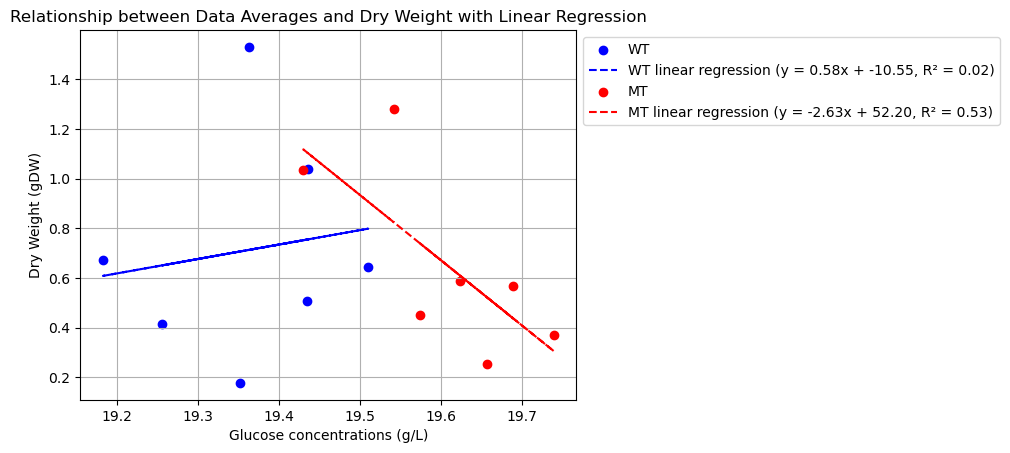

In [47]:
plt.scatter(WT_data.loc[0], WT_weightdata, color='blue', marker='o', label='WT')

# Perform linear regression for WT data
slope_WT, intercept_WT = np.polyfit(WT_data.loc[0], WT_weightdata, 1)

# Calculate R-squared value for WT data
residuals_WT = WT_weightdata - (slope_WT * WT_data.loc[0] + intercept_WT)
ss_res_WT = np.sum(np.square(residuals_WT))
ss_tot_WT = np.sum(np.square(WT_weightdata - np.mean(WT_weightdata)))
r_squared_WT = 1 - (ss_res_WT / ss_tot_WT)

# Plot the regression line for WT data
plt.plot(WT_data.loc[0], slope_WT * WT_data.loc[0] + intercept_WT, color='blue', linestyle='--', label=f'WT linear regression (y = {slope_WT:.2f}x + {intercept_WT:.2f}, R² = {r_squared_WT:.2f})')

# Scatter plot for MT data
plt.scatter(MT_data.loc[0], MT_weightdata, color='red', marker='o', label='MT')

# Perform linear regression for MT data
slope_MT, intercept_MT = np.polyfit(MT_data.loc[0], MT_weightdata, 1)

# Calculate R-squared value for MT data
residuals_MT = MT_weightdata - (slope_MT * MT_data.loc[0] + intercept_MT)
ss_res_MT = np.sum(np.square(residuals_MT))
ss_tot_MT = np.sum(np.square(MT_weightdata - np.mean(MT_weightdata)))
r_squared_MT = 1 - (ss_res_MT / ss_tot_MT)

# Plot the regression line for MT data
plt.plot(MT_data.loc[0], slope_MT * MT_data.loc[0] + intercept_MT, color='red', linestyle='--', label=f'MT linear regression (y = {slope_MT:.2f}x + {intercept_MT:.2f}, R² = {r_squared_MT:.2f})')

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Labels and title
plt.xlabel('Glucose concentrations (g/L)')
plt.ylabel('Dry Weight (gDW)')
plt.title('Relationship between Data Averages and Dry Weight with Linear Regression')
plt.grid(True)

# Calculate yield (X) for WT and MT
initial_biomass_WT = WT_weightdata[0]
final_biomass_WT = WT_weightdata[-1]
yield_WT = final_biomass_WT - initial_biomass_WT

initial_biomass_MT = MT_weightdata[0]
final_biomass_MT = MT_weightdata[-1]
yield_MT = final_biomass_MT - initial_biomass_MT

# Assuming substrate consumed (S) is known
substrate_consumed_WT = WT_S_last - WT_S_first
substrate_consumed_MT = MT_S_last - MT_S_first

yield_coefficient_WT = yield_WT / substrate_consumed_WT
yield_coefficient_MT = yield_MT / substrate_consumed_MT

print(f'Yield Coefficient for WT: {yield_coefficient_WT:.2f}')
print(f'Yield Coefficient for MT: {yield_coefficient_MT:.2f}')

plt.show()